In [1]:
import pandas as pd

file_path = r'C:\Users\shiva\Desktop\Python 19102023\ratings.csv'

df = pd.read_csv(file_path)

In [2]:
df.shape

(100836, 4)

In [3]:
file_path = r'C:\Users\shiva\Desktop\Python 19102023\movies.csv'

df1 = pd.read_csv(file_path)

In [4]:
df1.shape

(9742, 3)

In [5]:
file_path = r'C:\Users\shiva\Desktop\Python 19102023\tags.csv'

df2 = pd.read_csv(file_path)

In [6]:
file_path = r'C:\Users\shiva\Desktop\Python 19102023\links.csv'

df3 = pd.read_csv(file_path)

In [7]:
unique_user_ids = df['userId'].unique()

num_unique_user_ids = len(unique_user_ids)

print("Number of unique user IDs:", num_unique_user_ids)

Number of unique user IDs: 610


In [8]:
merged_df = pd.merge(df, df1, on='movieId', how='inner')

ratings_count = df.groupby('movieId')['rating'].count().reset_index(name='count')

max_rated_movie = ratings_count[ratings_count['count'] == ratings_count['count'].max()]

max_rated_movie

,movieId,count
314,356,329


In [9]:
movie_title_356 = merged_df[merged_df['movieId'] == 356]['title'].iloc[0]

print("\nMovie that has recieved max no of user ratings:", movie_title_356)


Movie that has recieved max no of user ratings: Forrest Gump (1994)


In [10]:
merged_df1 = pd.merge(df1, df2, on='movieId')

matrix_tags = merged_df1[merged_df1['title'] == 'Matrix, The (1999)']

print(matrix_tags['tag'])

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object


In [11]:
average_rating = (
    pd.merge(df, df1, on='movieId')
    .query('title == "Terminator 2: Judgment Day (1991)"')
    ['rating']
    .mean()
)

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


(array([ 3.,  0.,  1.,  5.,  3., 10., 17., 49., 49., 81.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

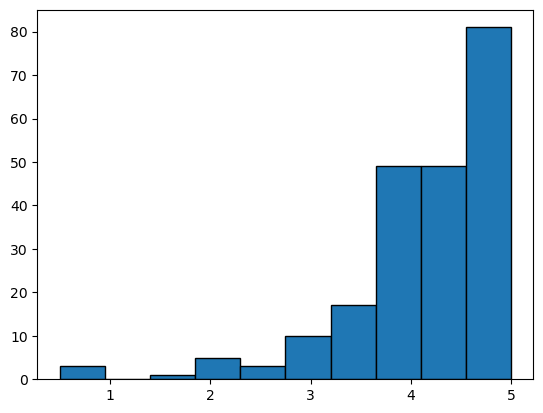

In [12]:
import matplotlib.pyplot as plt

merged_ratings_df = pd.merge(df, df1, on='movieId')

movie_FightClub_ratings = merged_ratings_df[merged_ratings_df['title'] == 'Fight Club (1999)']

plt.hist(movie_FightClub_ratings['rating'], bins=10, edgecolor='black')

In [13]:
merged_df2 = (pd.merge(df1, df.groupby('movieId')['rating'].agg(['count', 'mean'])
                       .reset_index(), on='movieId', how='inner'))

df5 = merged_df2.query('count > 50')

most_popular_movie = df5.nlargest(1, 'mean').iloc[0]['title']

print("The most popular movie with more than 50 ratings is:", most_popular_movie)

The most popular movie with more than 50 ratings is: Shawshank Redemption, The (1994)


In [14]:
top5_popular_movies = df5.sort_values(by='count', ascending=False).head(5)

print(top5_popular_movies[['title', 'count']])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [15]:
third_most_popular_sci_fi_movie = (df5[df5['genres'].str.contains('Sci-Fi')]
                                   .nlargest(3, 'count').iloc[-1]['title'])

print("The third most popular Sci-Fi movie based on user ratings is:", third_most_popular_sci_fi_movie)

The third most popular Sci-Fi movie based on user ratings is: Jurassic Park (1993)


In [16]:
df6 = pd.merge(df5,df3, on = 'movieId')

highest_imdb_movie = df6[df6['imdbId'] == df6['imdbId'].max()]

highest_imdb_movie_id = highest_imdb_movie['movieId'].iloc[0]
print("Movie with the highest IMDB rating has movieId:", highest_imdb_movie_id)

Movie with the highest IMDB rating has movieId: 109374


In [17]:
highest_imdb_sci_fi_movie_id = (
    df5[df5['genres'].str.contains('Sci-Fi')]
    .merge(df6, on='movieId', how='inner')
    .nlargest(1, 'imdbId')['movieId']
    .iloc[0]
)

print("Sci-Fi movie with the highest IMDB rating has movieId:", highest_imdb_sci_fi_movie_id)

Sci-Fi movie with the highest IMDB rating has movieId: 112852
